In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./data/mnist/", one_hot = True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting ./data/mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting ./data/mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/mnist/t10k-labels-idx1-ubyte.gz


In [2]:
num_input = 28 * 28
num_hidden = 256

learning_rate = 0.01
training_epoch = 10
batch_size = 100

num_output_sample = 10

In [3]:
x_true = tf.placeholder(tf.float32, [None, num_input])
y_true = x_true

weight_encoder = tf.Variable(tf.truncated_normal([num_input, num_hidden]))
bias_encoder = tf.Variable(tf.truncated_normal([num_hidden]))

weight_decoder = tf.Variable(tf.truncated_normal([num_hidden, num_input]))
bias_decoder = tf.Variable(tf.truncated_normal([num_input]))

In [4]:
encoder = tf.nn.sigmoid(tf.add(tf.matmul(x_true, weight_encoder), bias_encoder))
decoder = tf.nn.sigmoid(tf.add(tf.matmul(encoder, weight_decoder), bias_decoder))

cost = tf.reduce_mean(tf.square(y_true - decoder))
optimizer = tf.train.AdamOptimizer(learning_rate)
optimizer = optimizer.minimize(cost)

In [7]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

total_batch = mnist.train.num_examples // batch_size

In [10]:
for epoch in range(training_epoch):
    total_cost = 0
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_value = sess.run([optimizer, cost], {x_true : batch_xs})
        total_cost += cost_value
    print("Epoch : {0}, Cost : {1}".format(epoch + 1, total_cost / total_batch))
print("Done")

Epoch : 1, Cost : 0.0601339857483452
Epoch : 2, Cost : 0.03704362856393511
Epoch : 3, Cost : 0.031147710738534277
Epoch : 4, Cost : 0.02941297791220925
Epoch : 5, Cost : 0.02824928531931205
Epoch : 6, Cost : 0.027675347724421456
Epoch : 7, Cost : 0.02728964924812317
Epoch : 8, Cost : 0.02705718839371746
Epoch : 9, Cost : 0.026880800398913298
Epoch : 10, Cost : 0.026718920770693908
Done


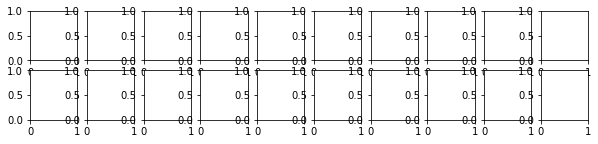

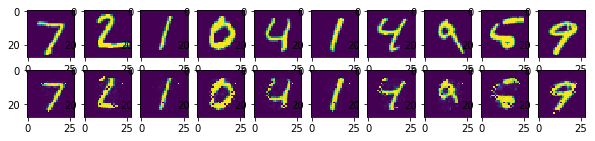

In [13]:
samples = sess.run(decoder, {x_true : mnist.test.images[:num_output_sample]})
fig, ax = plt.subplots(2, num_output_sample, figsize = (num_output_sample, 2))

for i in range(num_output_sample):
    ax[0][i].set_axis_off
    ax[1][i].set_axis_off
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
plt.show()